<a href="https://colab.research.google.com/github/gcasaldi/football/blob/main/Football_Match_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
saife245_english_premier_league_path = kagglehub.dataset_download('saife245/english-premier-league')

print('Data source import complete.')


100%|██████████| 1.12M/1.12M [00:00<00:00, 32.3MB/s]

Extracting files...


Data source import complete.


# Predicting the Winning Football Team

- Sports betting is a 500 billion dollar market (Sydney Herald)

- Football is played by 250 million players in over 200 countries (most popular sport globally).
- The English Premier League is the most popular domestic team in the world.
- Design a predictive model capable of accurately predicting if the home team will win a football match?


**Discription of Dataset**

**A prediction system was built to predict whether a home team will win it's match or not.**

Key to results data:
* Div = League Division
* Date = Match Date (dd/mm/yy)
* Time = Time of match kick-off
* HomeTeam = Home Team
* Away team = Away Team
* FTHG and HG = Full Time Home Team Goals
* FTAG and AG = Full-Time Away Team Goals
* FTR and Res = Full-Time Result (H=Home Win, D=Draw, A=Away Win)
* HTHG = Half Time Home Team Goals
* HTAG = Half Time Away Team Goals
* HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
* Attendance = Crowd Attendance
* Referee = Match Referee
* HS = Home Team Shots
* AS = Away Team Shots
* HST = Home Team Shots on Target
* AST = Away Team Shots on Target
* HHW = Home Team Hit Woodwork
* AHW = Away Team Hit Woodwork
* HC = Home Team Corners
* AC = Away Team Corners
* HF = Home Team Fouls Committed
* AF = Away Team Fouls Committed
* HFKC = Home Team Free Kicks Conceded
* AFKC = Away Team Free Kicks Conceded
* HO = Home Team Offsides
* AO = Away Team Offsides
* HY = Home Team Yellow Cards
* AY = Away Team Yellow Cards
*HR = Home Team Red Cards
AR = Away Team Red Cards
HBP = Home Team Bookings Points (10 = yellow, 25 = red)
ABP = Away Team Bookings Points (10 = yellow, 25 = red)

### Importing the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

In [7]:
# Read data from the CSV into a dataframe
# Use the path provided by kagglehub.dataset_download
folder = saife245_english_premier_league_path + '/Datasets/'
raw_data_1 = pd.read_csv(folder +'2000-01.csv')
raw_data_2 = pd.read_csv(folder +'2001-02.csv')
raw_data_3 = pd.read_csv(folder +'2002-03.csv')
raw_data_4 = pd.read_csv(folder +'2003-04.csv')
raw_data_5 = pd.read_csv(folder +'2004-05.csv')
raw_data_6 = pd.read_csv(folder +'2005-06.csv')
raw_data_7 = pd.read_csv(folder +'2006-07.csv')
raw_data_8 = pd.read_csv(folder +'2007-08.csv')
raw_data_9 = pd.read_csv(folder +'2008-09.csv')
raw_data_10 = pd.read_csv(folder +'2009-10.csv')
raw_data_11 = pd.read_csv(folder +'2010-11.csv')
raw_data_12 = pd.read_csv(folder +'2011-12.csv')
raw_data_13 = pd.read_csv(folder +'2012-13.csv')
raw_data_14 = pd.read_csv(folder +'2013-14.csv')
raw_data_15 = pd.read_csv(folder +'2014-15.csv')
raw_data_16 = pd.read_csv(folder +'2015-16.csv')
raw_data_17 = pd.read_csv(folder +'2016-17.csv')
raw_data_18 = pd.read_csv(folder +'2017-18.csv')

In [8]:

#Gets all the statistics related to gameplay

columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

playing_statistics_1 = raw_data_1[columns_req]
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]
playing_statistics_8 = raw_data_8[columns_req]
playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]
playing_statistics_17 = raw_data_17[columns_req]
playing_statistics_18 = raw_data_18[columns_req]


**GOALS SCORED AND CONCEDED AT THE END OF MATCHWEEK, ARRANGED BY TEAMS AND MATCHWEEK**

In [13]:
# Gets the goals scored agg arranged by teams and matchweek
def get_goals_scored(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    # Get unique team names directly
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []

    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)

    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored



# Gets the goals conceded agg arranged by teams and matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    # Get unique team names directly
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []

    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)

    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)

    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC

    return playing_stat


# Apply to each dataset
playing_statistics_1 = get_gss(playing_statistics_1)
playing_statistics_2 = get_gss(playing_statistics_2)
playing_statistics_3 = get_gss(playing_statistics_3)
playing_statistics_4 = get_gss(playing_statistics_4)
playing_statistics_5 = get_gss(playing_statistics_5)
playing_statistics_6 = get_gss(playing_statistics_6)
playing_statistics_7 = get_gss(playing_statistics_7)
playing_statistics_8 = get_gss(playing_statistics_8)
playing_statistics_9 = get_gss(playing_statistics_9)
playing_statistics_10 = get_gss(playing_statistics_10)
playing_statistics_11 = get_gss(playing_statistics_11)
playing_statistics_12 = get_gss(playing_statistics_12)
playing_statistics_13 = get_gss(playing_statistics_13)
playing_statistics_14 = get_gss(playing_statistics_14)
playing_statistics_15 = get_gss(playing_statistics_15)
playing_statistics_16 = get_gss(playing_statistics_16)
playing_statistics_17 = get_gss(playing_statistics_17)
playing_statistics_18 = get_gss(playing_statistics_18)

/tmp/ipython-input-2166386952.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipython-input-2166386952.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipython-input-2166386952.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

**GET RESPECTIVE POINTS**

In [21]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0


def get_cuml_points(matchres):
    # Add a print statement to inspect the matchres DataFrame
    print("Inspecting matchres DataFrame in get_cuml_points:")
    print(matchres.head())
    print(matchres.tail())
    print(matchres.info())
    print(matchres.stack().value_counts()) # Check the values and their counts

    # Use .map() instead of .applymap() as recommended by FutureWarning
    matchres_points = matchres.map(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]

    # Corrected: Initialize with 0 points for all teams before the first matchweek
    matchres_points.insert(column =0, loc = 0, value = [0 for _ in range(len(matchres_points))])
    return matchres_points


def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    # Get unique team names directly from the 'HomeTeam' column
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')

    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    # Simplified the match week index calculation
    for i in range(len(playing_stat)):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        # Calculate the match week index (0-based)
        match_week_index = i // 10
        HTP.append(cum_pts.loc[ht][match_week_index])
        ATP.append(cum_pts.loc[at][match_week_index])


    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat

# Apply to each dataset
playing_statistics_1 = get_agg_points(playing_statistics_1)
playing_statistics_2 = get_agg_points(playing_statistics_2)
playing_statistics_3 = get_agg_points(playing_statistics_3)
playing_statistics_4 = get_agg_points(playing_statistics_4)
playing_statistics_5 = get_agg_points(playing_statistics_5)
playing_statistics_6 = get_agg_points(playing_statistics_6)
playing_statistics_7 = get_agg_points(playing_statistics_7)
playing_statistics_8 = get_agg_points(playing_statistics_8)
playing_statistics_9 = get_agg_points(playing_statistics_9)
playing_statistics_10 = get_agg_points(playing_statistics_10)
playing_statistics_11 = get_agg_points(playing_statistics_11)
playing_statistics_12 = get_agg_points(playing_statistics_12)
playing_statistics_13 = get_agg_points(playing_statistics_13)
playing_statistics_14 = get_agg_points(playing_statistics_14)
playing_statistics_15 = get_agg_points(playing_statistics_15)
playing_statistics_16 = get_agg_points(playing_statistics_16)
playing_statistics_17 = get_agg_points(playing_statistics_17)
playing_statistics_18 = get_agg_points(playing_statistics_18)

Inspecting matchres DataFrame in get_cuml_points:
         1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Charlton  W  L  L  D  D  W  W  D  L  W  ...  D  L  W  L  L  D  W  W  L  L
Chelsea   W  L  D  D  D  L  D  W  L  W  ...  L  W  W  W  W  L  L  W  D  W
Coventry  L  W  W  L  D  L  L  D  W  L  ...  D  L  W  W  L  W  L  L  L  D
Derby     D  L  D  D  D  L  D  L  L  L  ...  W  D  L  L  L  W  L  L  W  D
Leeds     W  W  L  D  L  D  W  W  L  D  ...  D  W  W  W  W  W  W  L  W  W

[5 rows x 38 columns]
            1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Man City     L  W  L  W  L  D  D  L  W  W  ...  L  D  L  L  L  W  D  W  L  L
Newcastle    L  W  W  W  D  L  L  W  W  L  ...  L  D  L  W  D  W  D  L  D  W
Southampton  D  L  D  D  L  W  W  L  D  L  ...  W  L  L  L  D  L  D  L  W  W
West Ham     L  L  D  D  L  D  W  D  D  L  ...  L  L  L  D  W  L  L  L  W  L
Aston Villa  D  D  L  W  W  D  W  L  D  W  ...  D  W  W  D  W  D  D  D  W  L

[5 rows x 38 columns

/tmp/ipython-input-3748316549.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipython-input-3748316549.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP


Inspecting matchres DataFrame in get_cuml_points:
          1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Charlton   L  W  D  L  D  W  D  D  L  L  ...  D  W  L  L  L  L  D  L  D  D
Derby      W  L  D  D  L  L  L  L  D  D  ...  L  W  L  L  L  L  L  L  L  D
Leeds      W  W  D  D  W  W  W  D  D  D  ...  W  W  W  L  L  W  W  L  W  W
Leicester  L  L  D  W  L  D  L  L  L  L  ...  D  D  L  W  L  L  D  D  D  W
Liverpool  W  L  L  W  W  W  D  W  W  W  ...  W  W  W  W  W  W  W  L  W  W

[5 rows x 38 columns]
            1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Fulham       L  W  D  D  L  D  D  L  D  W  ...  L  L  L  D  L  D  W  W  D  L
Southampton  L  L  L  W  L  W  L  L  D  L  ...  D  D  D  D  L  W  D  L  L  W
West Ham     L  D  D  L  W  L  L  W  W  W  ...  W  L  W  W  W  D  W  L  L  W
Aston Villa  D  D  W  D  W  W  W  L  W  W  ...  L  L  D  L  D  L  L  D  W  W
Newcastle    D  D  W  W  L  W  L  W  L  W  ...  L  D  W  D  D  W  W  D  W  L

[5 rows x 38 c

/tmp/ipython-input-3748316549.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipython-input-3748316549.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP


Inspecting matchres DataFrame in get_cuml_points:
          1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Blackburn  D  W  D  L  L  D  W  W  L  W  ...  W  W  L  W  W  L  D  W  D  W
Charlton   L  W  L  W  L  L  D  L  L  W  ...  L  L  D  L  L  L  L  W  L  L
Everton    D  W  D  L  L  W  L  W  L  W  ...  D  D  L  W  W  L  L  W  L  L
Fulham     W  D  L  W  W  D  L  W  D  L  ...  W  D  L  L  L  W  L  D  W  W
Leeds      W  W  L  L  W  W  L  L  D  L  ...  L  L  L  W  D  L  W  L  W  W

[5 rows x 38 columns]
            1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Middlesboro  D  D  W  L  W  L  W  W  W  L  ...  W  W  D  W  D  L  L  L  W  L
Sunderland   D  L  W  D  L  L  L  W  L  L  ...  L  L  L  L  L  L  L  L  L  L
Tottenham    D  W  W  W  L  W  L  L  W  W  ...  L  L  L  W  D  L  W  L  L  L
West Brom    L  L  L  W  W  W  L  L  L  D  ...  L  L  L  L  L  W  L  L  D  D
West Ham     L  D  L  L  L  D  W  L  W  W  ...  W  D  W  D  D  L  W  W  W  D

[5 rows x 38 c

/tmp/ipython-input-3748316549.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipython-input-3748316549.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP


Inspecting matchres DataFrame in get_cuml_points:
           1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Arsenal     W  W  W  W  D  D  W  W  W  D  ...  W  D  W  D  W  D  D  D  W  W
Birmingham  W  D  W  D  W  W  L  D  D  W  ...  L  W  D  L  L  D  D  D  L  D
Blackburn   W  D  L  D  L  W  L  L  L  L  ...  W  L  L  L  W  W  W  W  L  D
Fulham      W  L  W  D  D  W  W  D  L  W  ...  L  D  D  W  L  D  W  D  L  W
Leicester   D  L  D  L  W  L  L  L  L  L  ...  D  D  L  L  L  L  D  D  W  L

[5 rows x 38 columns]
              1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Southampton    D  D  D  W  W  W  L  L  D  W  ...  L  W  W  L  W  L  L  D  D  L
Tottenham      L  W  D  L  L  L  D  W  W  D  ...  L  L  L  L  D  L  D  L  W  W
Wolves         L  L  L  D  L  L  D  W  D  W  ...  L  L  L  D  L  W  D  W  D  L
Aston Villa    L  D  L  W  L  W  L  D  D  D  ...  L  W  D  D  W  D  W  W  D  L
Middlesbrough  L  L  D  L  L  W  W  L  L  D  ...  W  D  W  D  W  L  L  L  W 

/tmp/ipython-input-3748316549.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipython-input-3748316549.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP


Inspecting matchres DataFrame in get_cuml_points:
              1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Aston Villa    W  D  L  W  D  D  D  D  L  W  ...  W  L  W  D  W  D  D  L  L  L
Blackburn      D  L  L  D  L  W  L  D  L  L  ...  D  L  D  W  W  D  D  L  L  D
Bolton         W  L  W  W  D  D  D  L  W  W  ...  W  W  L  W  W  D  D  L  D  W
Man City       D  L  L  W  L  W  L  D  W  L  ...  L  L  D  W  D  W  D  W  W  D
Middlesbrough  D  L  W  W  W  L  L  D  W  D  ...  L  L  W  L  D  W  D  D  W  D

[5 rows x 38 columns]
            1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Man United   L  W  D  D  D  W  W  D  D  W  ...  D  W  D  L  L  W  W  D  L  W
Newcastle    D  L  D  L  W  W  W  D  D  W  ...  D  L  L  L  L  D  D  W  L  D
Southampton  L  W  L  L  D  L  L  D  L  D  ...  W  W  L  L  L  D  L  W  D  L
Arsenal      W  W  W  W  W  D  W  W  W  L  ...  W  W  W  W  D  W  W  W  W  L
West Brom    D  D  D  L  L  D  L  W  D  L  ...  L  W  W  D  D  L  D 

/tmp/ipython-input-3748316549.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipython-input-3748316549.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP


Inspecting matchres DataFrame in get_cuml_points:
              1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Aston Villa    D  L  D  W  L  D  L  L  W  L  ...  L  L  D  L  D  W  L  L  L  W
Everton        L  W  L  L  L  L  L  L  D  W  ...  W  W  L  D  D  L  L  D  W  D
Fulham         D  L  L  W  D  L  L  L  D  W  ...  L  L  W  D  L  W  W  W  L  W
Man City       D  W  W  W  D  L  L  W  W  L  ...  L  L  L  L  L  L  W  L  L  L
Middlesbrough  D  L  W  L  W  D  L  W  D  L  ...  L  W  W  L  L  W  L  D  D  L

[5 rows x 38 columns]
          1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Newcastle  L  D  L  L  D  W  W  D  L  W  ...  L  L  L  W  W  W  W  W  D  W
Tottenham  W  W  D  L  D  D  W  W  W  D  ...  L  W  W  L  W  W  L  D  W  L
West Brom  D  W  L  L  L  D  L  L  W  L  ...  D  L  L  L  D  L  D  L  L  D
Bolton     D  L  W  W  D  W  W  L  L  W  ...  L  L  L  L  L  D  W  L  D  W
Chelsea    W  W  W  W  W  W  W  W  W  D  ...  W  L  W  D  W  W  W  W  L  L

[5

/tmp/ipython-input-3748316549.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipython-input-3748316549.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP


Inspecting matchres DataFrame in get_cuml_points:
           1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Arsenal     D  L  D  W  W  W  W  W  D  L  ...  L  L  L  D  W  W  D  W  D  D
Bolton      W  D  L  W  D  W  W  W  W  L  ...  L  L  W  W  D  L  L  D  L  D
Everton     W  D  W  W  D  D  D  L  W  D  ...  D  W  D  W  D  W  L  L  W  D
Newcastle   W  L  L  W  L  D  L  L  L  D  ...  D  L  L  W  D  L  D  L  L  D
Portsmouth  W  D  W  W  W  L  L  W  L  W  ...  L  D  D  W  L  W  D  W  L  D

[5 rows x 38 columns]
              1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Fulham         L  D  W  W  D  L  D  W  D  L  ...  D  D  D  L  L  L  D  L  W  L
Man City       L  D  W  L  L  W  D  D  L  W  ...  W  W  D  W  D  L  D  L  L  L
Middlesbrough  L  W  L  D  D  L  L  W  W  L  ...  D  L  L  W  L  L  D  L  W  W
Liverpool      D  W  L  L  W  W  L  D  L  W  ...  L  D  W  W  D  W  W  L  L  D
Wigan          L  W  L  D  D  L  L  W  W  W  ...  W  D  L  L  D  D  L  L  L 

/tmp/ipython-input-3748316549.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipython-input-3748316549.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP


Inspecting matchres DataFrame in get_cuml_points:
              1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Aston Villa    L  D  W  W  L  W  D  W  L  D  ...  D  L  L  L  W  W  W  D  L  D
Bolton         L  L  L  W  L  L  D  D  L  L  ...  L  L  D  L  L  W  W  D  W  D
Derby          D  L  L  L  L  W  L  D  L  D  ...  L  L  L  D  L  L  L  L  L  L
Everton        W  W  L  D  W  L  L  W  L  L  ...  W  L  D  L  W  D  L  D  L  W
Middlesbrough  L  L  W  D  W  L  D  L  L  L  ...  D  D  W  L  D  D  L  L  W  W

[5 rows x 38 columns]
          1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Reading    D  L  W  L  L  L  W  L  W  L  ...  W  L  W  D  L  L  L  D  L  W
Wigan      L  W  W  D  L  D  L  L  L  L  ...  D  W  L  L  W  D  D  D  W  L
Newcastle  W  D  D  W  L  W  L  W  W  L  ...  L  D  W  W  W  D  W  D  L  L
Blackburn  W  D  D  W  D  L  W  W  W  W  ...  D  L  W  D  D  L  D  W  W  L
Liverpool  W  D  W  W  D  D  W  D  W  D  ...  W  W  L  W  D  W  W  D  W  W

[5

/tmp/ipython-input-3748316549.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipython-input-3748316549.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP


Inspecting matchres DataFrame in get_cuml_points:
              1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Arsenal        W  L  W  W  W  L  D  W  W  D  ...  W  W  W  W  D  W  W  L  D  W
Bolton         W  L  D  L  L  L  W  D  L  L  ...  L  D  W  L  L  D  D  D  D  L
Everton        L  W  L  W  D  L  D  L  D  W  ...  W  L  W  D  D  L  W  D  W  W
Hull           W  D  L  W  D  W  W  W  W  L  ...  D  L  D  L  L  L  L  L  D  L
Middlesbrough  W  L  W  L  L  L  W  L  D  W  ...  D  L  L  W  D  L  L  L  D  L

[5 rows x 38 columns]
           1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Tottenham   L  L  D  L  D  L  L  L  W  D  ...  W  W  L  W  W  L  W  D  W  L
West Brom   L  L  D  W  L  W  W  L  L  L  ...  D  D  L  D  L  W  L  W  L  D
Man City    L  W  W  L  W  L  L  D  W  L  ...  L  W  L  L  W  W  W  L  L  W
Wigan       L  L  W  D  D  W  L  L  L  L  ...  W  W  L  L  L  D  L  L  L  W
Portsmouth  L  L  W  W  L  W  W  D  D  L  ...  W  D  D  W  L  D  L  L  W 

/tmp/ipython-input-3748316549.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipython-input-3748316549.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP


Inspecting matchres DataFrame in get_cuml_points:
            1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Aston Villa  L  W  W  W  W  L  D  W  D  D  ...  D  D  L  W  D  W  W  W  L  L
Blackburn    L  L  D  W  L  W  L  W  L  L  ...  L  D  W  W  D  D  L  D  W  W
Bolton       L  L  L  W  D  W  D  L  W  L  ...  L  W  L  L  L  L  W  D  L  W
Chelsea      W  W  W  W  W  W  L  W  L  W  ...  W  D  W  W  W  W  L  W  W  W
Everton      L  L  W  L  W  W  D  D  L  D  ...  D  W  W  D  D  D  W  W  D  W

[5 rows x 38 columns]
          1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Liverpool  L  W  L  W  W  W  W  L  L  W  ...  L  W  L  W  D  D  W  W  L  D
Arsenal    W  W  L  L  W  W  W  W  D  W  ...  W  W  W  D  W  L  L  D  L  W
Man City   W  W  W  W  L  W  D  D  D  D  ...  W  L  W  W  W  L  D  W  L  D
Fulham     W  L  L  W  L  L  D  W  D  W  ...  L  L  L  W  D  D  L  W  L  L
West Ham   W  L  D  L  L  L  D  L  D  D  ...  L  L  L  L  D  W  L  W  L  D

[5 rows x 38 c

/tmp/ipython-input-3748316549.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipython-input-3748316549.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP


Inspecting matchres DataFrame in get_cuml_points:
            1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Aston Villa  W  L  W  L  D  W  L  D  L  D  ...  L  L  D  W  W  D  L  D  W  W
Blackburn    W  L  L  D  D  W  L  D  L  L  ...  L  D  D  D  L  L  W  D  D  W
Bolton       D  W  D  L  D  D  D  W  D  L  ...  W  L  L  W  W  L  L  L  L  L
Chelsea      W  W  W  W  W  L  W  D  W  W  ...  W  D  W  W  W  W  W  L  D  L
Sunderland   D  L  W  D  D  D  D  D  W  L  ...  D  L  L  L  L  W  L  W  L  W

[5 rows x 38 columns]
          1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
West Ham   L  L  L  L  D  W  D  D  L  L  ...  W  D  L  L  L  L  L  D  L  L
Fulham     D  D  D  W  D  D  D  L  L  W  ...  W  L  W  L  D  W  W  L  W  D
Newcastle  L  W  D  L  W  L  L  D  W  W  ...  L  L  W  L  D  D  L  W  D  D
Man City   D  W  L  D  W  W  W  W  L  L  ...  W  L  W  L  W  W  L  W  W  W
Blackpool  W  L  D  W  L  L  W  L  L  W  ...  L  D  L  L  L  D  D  D  W  L

[5 rows x 38 c

/tmp/ipython-input-3748316549.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipython-input-3748316549.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP


Inspecting matchres DataFrame in get_cuml_points:
          1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Blackburn  L  L  L  D  W  L  L  D  L  D  ...  W  L  L  L  L  L  W  L  L  L
Fulham     D  L  L  D  D  D  W  L  L  W  ...  L  L  W  W  D  W  L  W  W  L
Liverpool  D  W  W  L  L  W  W  D  D  W  ...  L  L  L  D  W  L  W  L  W  L
Newcastle  D  W  W  D  D  W  W  D  W  W  ...  W  W  W  W  W  W  L  W  L  L
QPR        L  W  L  D  W  D  L  D  W  L  ...  W  L  W  L  W  L  W  L  W  L

[5 rows x 38 columns]
           1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Bolton      W  L  L  L  L  L  L  W  L  L  ...  W  W  L  L  D  W  D  L  D  D
Norwich     D  D  L  L  W  W  L  W  D  D  ...  L  W  L  D  W  L  L  L  D  W
Wolves      W  W  D  L  L  L  L  L  D  L  ...  L  L  L  L  L  D  L  D  D  L
Man United  W  W  W  W  W  D  W  D  L  W  ...  W  W  W  W  L  W  D  L  W  W
Tottenham   L  L  W  W  W  W  D  W  W  W  ...  D  D  W  D  L  L  W  W  D  W

[5 rows x 38 columns

/tmp/ipython-input-3748316549.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipython-input-3748316549.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP


Inspecting matchres DataFrame in get_cuml_points:
          1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Arsenal    D  D  W  W  D  L  W  L  W  L  ...  W  W  W  W  D  W  D  W  W  W
Fulham     W  L  L  W  W  L  D  W  D  D  ...  W  W  L  D  L  L  L  L  L  W
Newcastle  W  L  D  D  W  D  L  D  W  D  ...  W  L  L  W  L  D  L  D  W  L
QPR        L  D  L  D  L  L  L  D  L  D  ...  W  L  L  D  L  L  D  L  L  L
Reading    D  L  L  L  D  D  L  D  D  D  ...  L  L  L  L  D  L  D  W  L  L

[5 rows x 38 columns]
           1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
Swansea     W  W  D  L  L  L  D  W  L  D  ...  L  L  L  D  D  L  D  W  L  L
Tottenham   L  D  D  W  W  W  W  L  W  L  ...  L  L  W  D  W  D  W  D  W  W
Liverpool   L  D  L  D  L  W  D  W  D  D  ...  W  L  W  D  D  D  W  D  W  W
Stoke       D  D  D  D  L  W  D  L  D  L  ...  L  D  L  L  L  W  W  D  L  D
Sunderland  D  D  D  D  W  L  D  D  L  L  ...  L  D  L  L  W  W  L  D  D  L

[5 rows x 38 columns

/tmp/ipython-input-3748316549.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipython-input-3748316549.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP


Inspecting matchres DataFrame in get_cuml_points:
           1  2  3  4  5   ... 34 35 36 37 38
Arsenal     L  W  W  W  W  ...  W  W  W  W  W
Liverpool   W  W  W  D  L  ...  W  W  L  D  W
Norwich     D  L  W  L  L  ...  L  L  L  D  L
Sunderland  L  D  L  L  L  ...  W  W  W  W  L
Swansea     L  L  W  D  W  ...  L  W  W  L  W

[5 rows x 38 columns]
            1  2  3  4  5   ... 34 35 36 37 38
Southampton  W  D  L  D  W  ...  L  D  W  W  D
Stoke        L  W  W  D  L  ...  W  D  L  W  W
Cardiff      L  W  D  D  L  ...  W  D  L  L  L
Tottenham    W  W  L  W  W  ...  D  W  W  L  W
Man United   W  D  L  W  L  ...  L  W  L  W  D

[5 rows x 38 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Arsenal to Man United
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       20 non-null     object
 1   2       20 non-null     object
 2   3       20 non-null     object
 3   4       20 non-null     object
 4   5       20 no

**GET TEAM FORM:**

In [16]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]

    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam

        past = form.loc[ht][j]               # get past n results
        h.append(past[num-1])                    # 0 index is most recent

        past = form.loc[at][j]               # get past n results.
        a.append(past[num-1])                   # 0 index is most recent

        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h
    playing_stat['AM' + str(num)] = a


    return playing_stat


def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics

# Make changes to df
playing_statistics_1 = add_form_df(playing_statistics_1)
playing_statistics_2 = add_form_df(playing_statistics_2)
playing_statistics_3 = add_form_df(playing_statistics_3)
playing_statistics_4 = add_form_df(playing_statistics_4)
playing_statistics_5 = add_form_df(playing_statistics_5)
playing_statistics_6 = add_form_df(playing_statistics_6)
playing_statistics_7 = add_form_df(playing_statistics_7)
playing_statistics_8 = add_form_df(playing_statistics_8)
playing_statistics_9 = add_form_df(playing_statistics_9)
playing_statistics_10 = add_form_df(playing_statistics_10)
playing_statistics_11 = add_form_df(playing_statistics_11)
playing_statistics_12 = add_form_df(playing_statistics_12)
playing_statistics_13 = add_form_df(playing_statistics_13)
playing_statistics_14 = add_form_df(playing_statistics_14)
playing_statistics_15 = add_form_df(playing_statistics_15)
playing_statistics_16 = add_form_df(playing_statistics_16)
playing_statistics_17 = add_form_df(playing_statistics_17)
playing_statistics_18 = add_form_df(playing_statistics_18)

/tmp/ipython-input-3533638426.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HM' + str(num)] = h
/tmp/ipython-input-3533638426.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['AM' + str(num)] = a
/tmp/ipython-input-3533638426.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [22]:
# Rearranging columns
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

playing_statistics_1 = playing_statistics_1[cols]
playing_statistics_2 = playing_statistics_2[cols]
playing_statistics_3 = playing_statistics_3[cols]
playing_statistics_4 = playing_statistics_4[cols]
playing_statistics_5 = playing_statistics_5[cols]
playing_statistics_6 = playing_statistics_6[cols]
playing_statistics_7 = playing_statistics_7[cols]
playing_statistics_8 = playing_statistics_8[cols]
playing_statistics_9 = playing_statistics_9[cols]
playing_statistics_10 = playing_statistics_10[cols]
playing_statistics_11 = playing_statistics_11[cols]
playing_statistics_12 = playing_statistics_12[cols]
playing_statistics_13 = playing_statistics_13[cols]
playing_statistics_14 = playing_statistics_14[cols]
playing_statistics_15 = playing_statistics_15[cols]
playing_statistics_16 = playing_statistics_16[cols]
playing_statistics_17 = playing_statistics_17[cols]
playing_statistics_18 = playing_statistics_18[cols]

**Get MatchWeek:**

In [23]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

playing_statistics_1 = get_mw(playing_statistics_1)
playing_statistics_2 = get_mw(playing_statistics_2)
playing_statistics_3 = get_mw(playing_statistics_3)
playing_statistics_4 = get_mw(playing_statistics_4)
playing_statistics_5 = get_mw(playing_statistics_5)
playing_statistics_6 = get_mw(playing_statistics_6)
playing_statistics_7 = get_mw(playing_statistics_7)
playing_statistics_8 = get_mw(playing_statistics_8)
playing_statistics_9 = get_mw(playing_statistics_9)
playing_statistics_10 = get_mw(playing_statistics_10)
playing_statistics_11 = get_mw(playing_statistics_11)
playing_statistics_12 = get_mw(playing_statistics_12)
playing_statistics_13 = get_mw(playing_statistics_13)
playing_statistics_14 = get_mw(playing_statistics_14)
playing_statistics_15 = get_mw(playing_statistics_15)
playing_statistics_16 = get_mw(playing_statistics_16)
playing_statistics_17 = get_mw(playing_statistics_17)
playing_statistics_18 = get_mw(playing_statistics_18)

**FINAL DATAFRAME**

In [24]:
playing_stat = pd.concat([playing_statistics_1,
                          playing_statistics_2,
                          playing_statistics_3,
                          playing_statistics_4,
                          playing_statistics_5,
                          playing_statistics_6,
                          playing_statistics_7,
                          playing_statistics_8,
                          playing_statistics_9,
                          playing_statistics_10,
                          playing_statistics_11,
                          playing_statistics_12,
                          playing_statistics_13,
                          playing_statistics_14,
                          playing_statistics_15,
                          playing_statistics_16,
                          playing_statistics_17,
                          playing_statistics_18
                          ], ignore_index=True)


# Gets the form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)

# Identify Win/Loss Streaks if any.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0

def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0

def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0

def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0

playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

playing_stat.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [25]:
# Get Goal Difference
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

In [26]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

In [27]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'

playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

# Testing set (2015-16 season)
playing_stat_test = playing_stat[5700:]

In [28]:
#saving the final dataset
playing_stat.to_csv('final_dataset.csv')

In [29]:
#saving the test set
playing_stat_test.to_csv("test_set.csv")

In [30]:
#loading the final dataset
dataset = pd.read_csv('final_dataset.csv')

In [31]:
dataset.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [32]:
dataset.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

### Correlation Matrix for dataset

<Axes: >

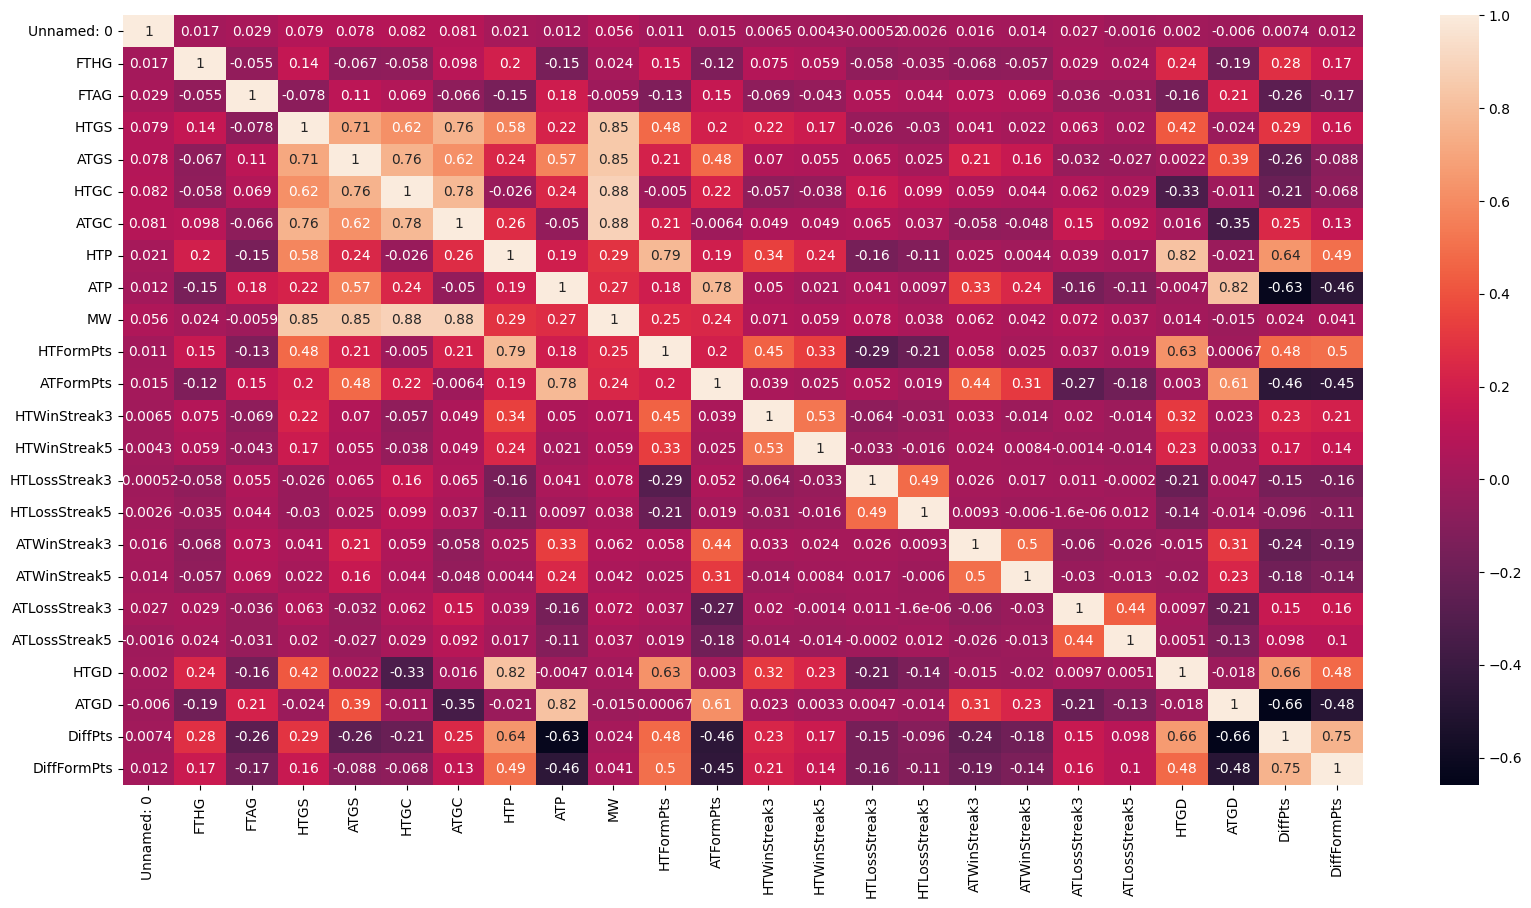

In [34]:
plt.figure(figsize=(20,10))
# Exclude non-numeric columns before calculating correlation
sns.heatmap(dataset.select_dtypes(include=np.number).corr(), annot= True)

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

In [35]:
# Remove few column
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

In [36]:
dataset2.keys()

Index(['Unnamed: 0', 'FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2',
       'AM3', 'HTGD', 'ATGD', 'DiffFormPts'],
      dtype='object')

In [37]:
dataset2.head(10)

,Unnamed: 0,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
1,1,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2,2,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
3,3,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
4,4,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
5,5,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
6,6,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
7,7,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
8,8,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
9,9,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0


In [38]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = dataset2.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = dataset2.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(dataset2[dataset2.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 6840
Number of features: 12
Number of matches won by home team: 3176
Win rate of home team: 46.43%


## Visualise the dataset

array([[<Axes: xlabel='HTGD', ylabel='HTGD'>,
        <Axes: xlabel='ATGD', ylabel='HTGD'>,
        <Axes: xlabel='HTP', ylabel='HTGD'>,
        <Axes: xlabel='ATP', ylabel='HTGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTGD'>],
       [<Axes: xlabel='HTGD', ylabel='ATGD'>,
        <Axes: xlabel='ATGD', ylabel='ATGD'>,
        <Axes: xlabel='HTP', ylabel='ATGD'>,
        <Axes: xlabel='ATP', ylabel='ATGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATGD'>],
       [<Axes: xlabel='HTGD', ylabel='HTP'>,
        <Axes: xlabel='ATGD', ylabel='HTP'>,
        <Axes: xlabel='HTP', ylabel='HTP'>,
        <Axes: xlabel='ATP', ylabel='HTP'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTP'>],
       [<Axes: xlabel='HTGD', ylabel='ATP'>,
        <Axes: xlabel='ATGD', ylabel='ATP'>,
        <Axes: xlabel='HTP', ylabel='ATP'>,
        <Axes: xlabel='ATP', ylabel='ATP'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATP'>],
       [<Axes: xlabel='HTGD', ylabel='DiffFormPts'>,
        <Axes

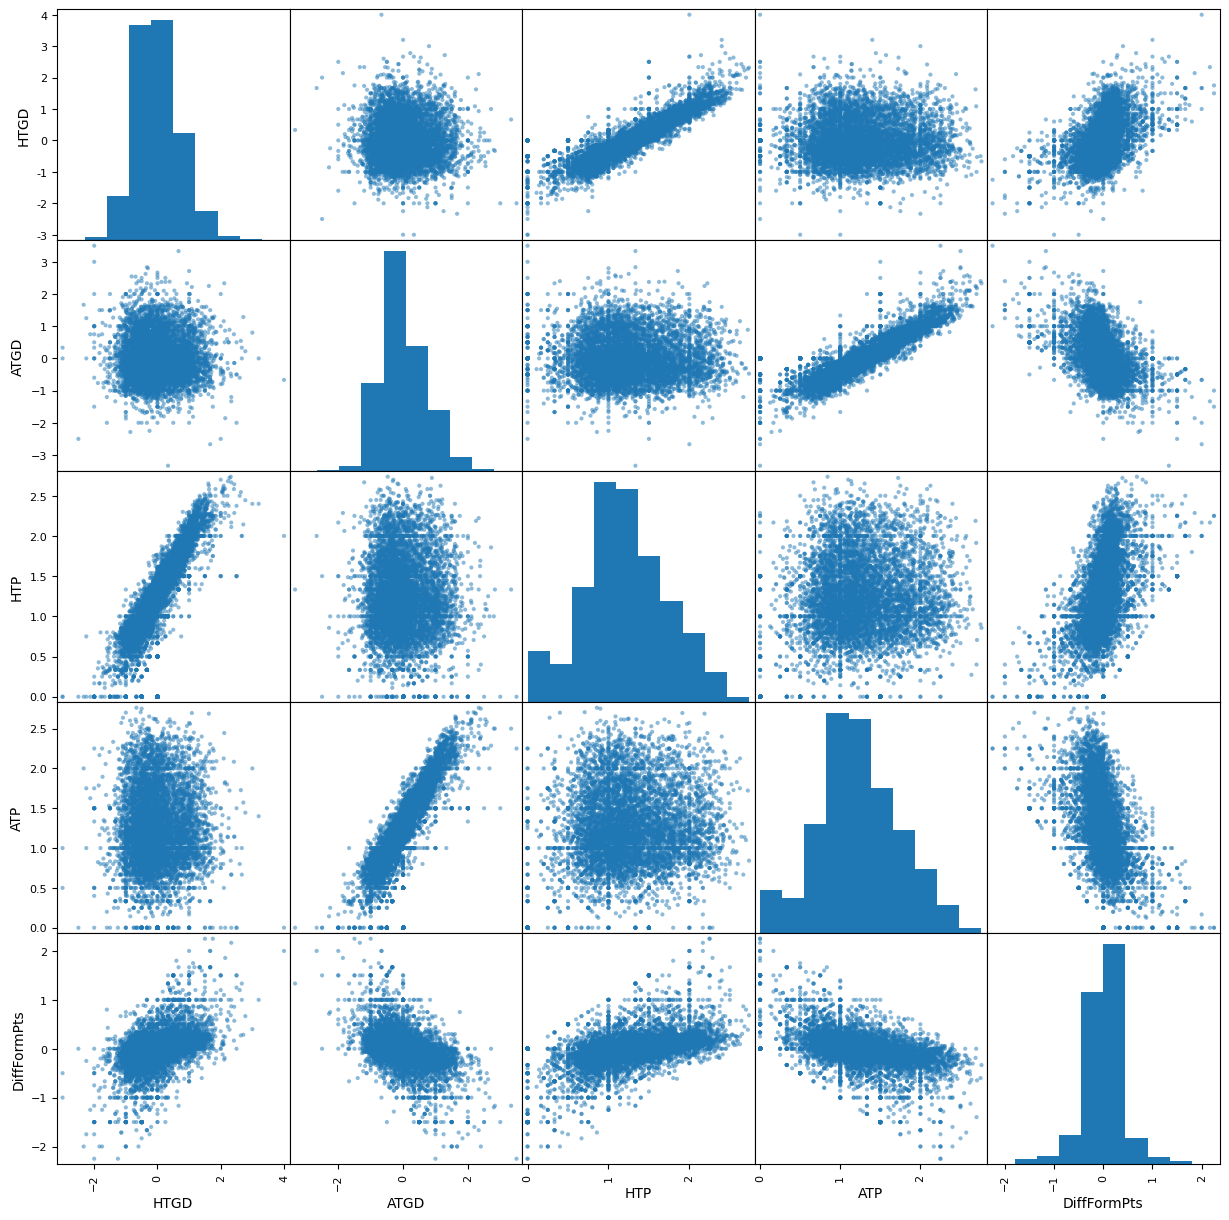

In [39]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another.
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(dataset2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

In [41]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = dataset2.drop(['FTR'], axis=1)
y_all = dataset2['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [43]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''

    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.items(): # Changed iteritems() to items()

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)

        # Collect the revised columns
        output = output.join(col_data)

    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (30 total features):
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


In [ ]:
X_all.head(10)

## Spliting the dataset

In [44]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all)

# Applying the Logistic Regression

In [45]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [46]:
Y_pred = classifier.predict(X_test)

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

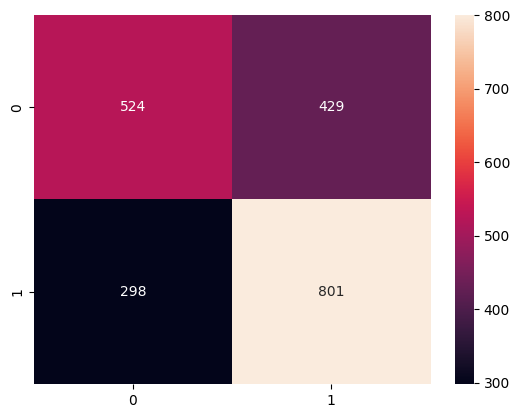

In [48]:
sns.heatmap(cm, annot=True,fmt='d')

In [49]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.64      0.55      0.59       953
          NH       0.65      0.73      0.69      1099

    accuracy                           0.65      2052
   macro avg       0.64      0.64      0.64      2052
weighted avg       0.64      0.65      0.64      2052



# Applying the SVM

In [50]:
#fitting the SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [51]:
#predicting result
Y_pred = classifier.predict(X_test)

In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

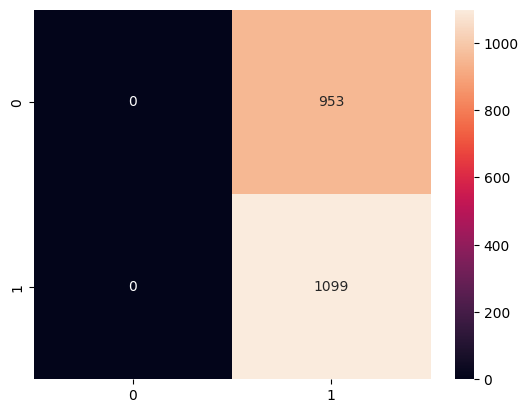

In [53]:
sns.heatmap(cm, annot=True, fmt='d')

In [54]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.00      0.00      0.00       953
          NH       0.54      1.00      0.70      1099

    accuracy                           0.54      2052
   macro avg       0.27      0.50      0.35      2052
weighted avg       0.29      0.54      0.37      2052



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Applying the RandomForest

In [56]:
#fitting the RANDOM FOREST to the training se
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini',
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='sqrt', # Changed 'auto' to 'sqrt'
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

In [57]:
#predicting result
Y_pred = classifier.predict(X_test)

In [58]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

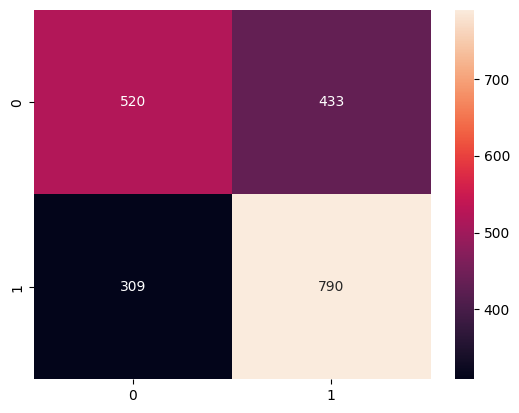

In [59]:
sns.heatmap(cm, annot=True, fmt='d')

In [60]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.63      0.55      0.58       953
          NH       0.65      0.72      0.68      1099

    accuracy                           0.64      2052
   macro avg       0.64      0.63      0.63      2052
weighted avg       0.64      0.64      0.64      2052



# Applying the XGBoost

In [62]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

classifier = XGBClassifier(seed=82)
classifier.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [63]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [69]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# Transform numerical predictions back to original labels
Y_pred_decoded = le.inverse_transform(Y_pred)

cm = confusion_matrix(y_test, Y_pred_decoded)

<Axes: >

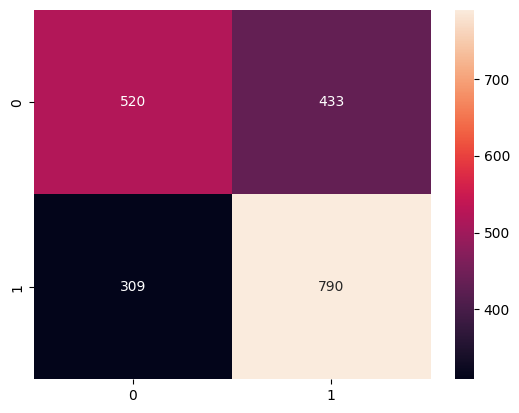

In [65]:
sns.heatmap(cm, annot=True,fmt='d')

In [70]:
print(classification_report(y_test, Y_pred_decoded))

              precision    recall  f1-score   support

           H       0.59      0.55      0.57       953
          NH       0.63      0.67      0.65      1099

    accuracy                           0.61      2052
   macro avg       0.61      0.61      0.61      2052
weighted avg       0.61      0.61      0.61      2052



**Clearly XGBoost seems like the best model as it has the highest F1 score and accuracy score on the test set.**

# Tuning the parameters of XGBoost.


In [72]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Ensure y_train is encoded for GridSearchCV
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }

def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    # Ensure target is encoded if the classifier was trained on encoded data
    if isinstance(target.iloc[0], str):
         le = LabelEncoder()
         target_encoded = le.fit_transform(target)
    else:
         target_encoded = target

    y_pred = clf.predict(features)
    # Ensure predictions are decoded back to original labels for F1 score calculation
    if isinstance(target.iloc[0], str):
        # Check if the original target had string labels
        if le.classes_[0] == 'H' or le.classes_[0] == 'NH': # Check if le was fitted on H/NH
             y_pred_decoded = le.inverse_transform(y_pred)
        else: # Handle cases where le might have been fitted on other labels
             # Attempt to inverse transform, but be cautious
             try:
                  y_pred_decoded = le.inverse_transform(y_pred)
             except ValueError:
                  # If inverse transform fails, assume predictions are already in target format
                  y_pred_decoded = y_pred

    else:
        y_pred_decoded = y_pred


    return f1_score(target, y_pred_decoded, pos_label='H'), sum(target == y_pred_decoded) / float(len(y_pred_decoded))


# TODO: Initialize the classifier
# The classifier will be trained on encoded labels, so it expects numerical target
clf = xgb.XGBClassifier(seed=2)

# TODO: Make an f1 scoring function using 'make_scorer'
# make_scorer will handle the scoring based on the original labels
# Set pos_label to the numerical encoding of 'H'
f1_scorer = make_scorer(f1_score, pos_label=0)


# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
# Pass the encoded training data to grid search
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train_encoded)

# Get the estimator
clf = grid_obj.best_estimator_
print(clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print( "F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))

f1, acc = predict_labels(clf, X_test, y_test)
print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.4, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=40,
              n_jobs=None, num_parallel_tree=None, ...)
F1 score and accuracy score for training set: 0.6151 , 0.6706.
F1 score and accuracy score for test set: 0.5818 , 0.6462.


#### Probably little best!!!!!!!!

Accuracy is not soo good but it can improved.

Actually it only depend upon past year match dataset,we can improve the accuracy by putting twitter data related to match, sentiment analysis, chances of player to play a specific match,player performace in recent series,etc..

I hope you find this kernel useful and enjoyable. If so please upVote

Your comments and feedback are most welcome.

In [73]:
import pandas as pd
from sklearn.preprocessing import scale # Import scale

# Function to preprocess new match data
def preprocess_new_match_data(match_data, X_train_cols):
    """
    Preprocesses new match data to be compatible with the trained model.
    Assumes match_data is a pandas DataFrame with relevant columns.
    """
    # Select relevant columns used for training
    cols_for_prediction = ['HTGD', 'ATGD', 'HTP', 'ATP', 'DiffFormPts',
                           'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3']
    processed_data = match_data[cols_for_prediction].copy()

    # Scale numerical features using the same scaling as the training data
    # Note: In a real application, you would save and load the scaler used
    # on the training data to ensure consistent scaling.
    # For demonstration, we'll just apply scaling based on the columns' means and stds from the training data.
    # This is a simplification and might not be perfectly accurate.
    # A better approach would be to use the scaler object fitted on X_train.
    # For this example, we'll use the means and stds calculated from the original X_all before get_dummies.
    # We need to re-calculate or store the original X_all's descriptive stats.
    # Let's assume we have the mean and std from the training data available.
    # For demonstration purposes, let's use the current dataset2 descriptive stats, which is a proxy.
    # In a real scenario, save the scaler object fitted on X_train.

    # Instead of re-calculating, let's use the scaling logic applied to X_all
    # This assumes the order and columns are the same
    cols_to_scale = ['HTGD','ATGD','HTP','ATP']
    # To correctly scale new data, you should use the scaler fitted on X_train.
    # As a workaround for this example, we'll re-apply the scale function.
    # In a real application, save and load the scaler.
    for col in cols_to_scale:
         if col in processed_data.columns: # Check if the column exists before scaling
             processed_data[col] = scale(processed_data[col])


    # Convert categorical features to dummy variables
    processed_data.HM1 = processed_data.HM1.astype('str')
    processed_data.HM2 = processed_data.HM2.astype('str')
    processed_data.HM3 = processed_data.HM3.astype('str')
    processed_data.AM1 = processed_data.AM1.astype('str')
    processed_data.AM2 = processed_data.AM2.astype('str')
    processed_data.AM3 = processed_data.AM3.astype('str')

    processed_data = preprocess_features(processed_data) # Use the existing preprocess_features function

    # Ensure the new data has the same columns as the training data, filling missing ones with 0
    # This is crucial for consistent input to the model
    for col in X_train_cols:
        if col not in processed_data.columns:
            processed_data[col] = 0

    # Reorder columns to match the training data
    processed_data = processed_data[X_train_cols]

    return processed_data

# Function to predict match outcomes
def predict_match_outcome(match_data, model, X_train_cols):
    """
    Predicts the outcome of matches using the trained model.
    Returns the predictions.
    """
    processed_data = preprocess_new_match_data(match_data, X_train_cols)
    predictions = model.predict(processed_data)
    return predictions

# Function to predict over/under goals (example based on historical average)
def predict_over_under(match_data, avg_goals=2.5):
    """
    Predicts if the total goals will be over or under a threshold
    based on historical average. This is a simplified example.
    """
    # This is a very basic approach. A more sophisticated model
    # would be needed for accurate over/under predictions.
    # For demonstration, let's just assume based on the average goals
    # from the training data or a fixed value.
    # In a real scenario, you'd likely train a separate model for this.

    # For this example, let's just return a placeholder prediction
    # based on a simple rule or a saved average from training data.
    # Let's assume the average total goals in the dataset is around 2.5.
    # We can't accurately predict over/under without more data/features
    # and a dedicated model for this.

    # Placeholder logic:
    predictions = []
    for index, row in match_data.iterrows():
        # This is a simplified placeholder. Replace with actual prediction logic.
        # This function currently relies on FTHG and FTAG, which are not available
        # before the match. A real over/under prediction would need a different approach.
        # For demonstration, we'll use dummy values or a simplified rule.
        # Let's just return a generic prediction based on the threshold.
        if (row['FTHG'] + row['FTAG']) > avg_goals: # This part needs actual goals
             predictions.append(f'Over {avg_goals}')
        else:
             predictions.append(f'Under {avg_goals}')
    return predictions

# --- Example Usage ---

# Create a placeholder DataFrame for today's matches
# In a real application, you would load today's match data from a source
today_matches_data = pd.DataFrame({
    'Date': ['01/01/2023', '01/01/2023'],
    'HomeTeam': ['Arsenal', 'Liverpool'],
    'AwayTeam': ['Chelsea', 'Man Utd'],
    'FTHG': [0, 0], # These will be the actual goals after the match,
    'FTAG': [0, 0], # but for prediction, we don't have them yet.
    'FTR': ['H', 'A'], # Placeholder, these are what we are trying to predict
    'HTGS': [10, 12], # Example data - replace with actual data for the day
    'ATGS': [8, 11],  # Example data
    'HTGC': [5, 7],  # Example data
    'ATGC': [6, 9],  # Example data
    'HTP': [25, 28], # Example data
    'ATP': [20, 22], # Example data
    'HM1': ['W', 'D'], # Example data
    'HM2': ['D', 'W'], # Example data
    'HM3': ['W', 'L'], # Example data
    'AM1': ['L', 'W'], # Example data
    'AM2': ['W', 'D'], # Example data
    'AM3': ['D', 'L'], # Example data
    'DiffFormPts': [3, 2], # Example data
     # Include other necessary columns with placeholder or actual values
})

# Calculate HTGD and ATGD for today's matches
today_matches_data['HTGD'] = today_matches_data['HTGS'] - today_matches_data['HTGC']
today_matches_data['ATGD'] = today_matches_data['ATGS'] - today_matches_data['ATGC']


# Make predictions for match outcome (Home Win or Not Home Win)
# Pass the columns from the training data to ensure consistency
match_predictions = predict_match_outcome(today_matches_data.copy(), clf, X_train.columns) # Use the best estimator (clf)

# Map predictions back to 1x2 (simplified: H for 'H', and D/A for 'NH')
# This is a simplification as the model only predicts 'H' or 'NH'.
# Predicting D or A would require a multi-class classification model.
# For this example, we'll map 'H' to 'H' and 'NH' to 'Away/Draw'
predicted_1x2 = ['H' if pred == 0 else 'Away/Draw' for pred in match_predictions] # Use 0 for H, 1 for NH


# Make predictions for over/under 2.5 goals (using the placeholder function)
# Note: This requires the actual goals scored in today's matches, which we don't have yet.
# This part of the request ("over 1,5 or under 1,5 or over or under 2.5 così come metterle in combo")
# is complex and would require a separate model or a different approach than the current one
# which is focused on predicting the match outcome (H/NH).
# For demonstration, let's just show how you *would* call an over/under prediction function,
# acknowledging that the function itself is a placeholder without a proper model.

# Example of calling the placeholder over/under prediction (requires actual goals)
# over_under_predictions = predict_over_under(today_matches_data.copy(), avg_goals=2.5)


# Display the predictions
print("Match Predictions (Home Win or Away/Draw):")
for i, prediction in enumerate(predicted_1x2):
    print(f"Match {i+1}: {today_matches_data.iloc[i]['HomeTeam']} vs {today_matches_data.iloc[i]['AwayTeam']} -> Predicted Outcome: {prediction}")

# Print a note about the over/under and 1x2 prediction limitations
print("\nNote on Over/Under and 1x2 Predictions:")
print("The current model is trained to predict 'Home Win' (H) or 'Not Home Win' (NH).")
print("Predicting specific outcomes like Draw (D), Away Win (A), Over/Under 1.5, or Over/Under 2.5")
print("would require training separate models or using a multi-class classification approach for 1x2.")
print("The 'predict_over_under' function above is a placeholder and does not use a trained model.")

Match Predictions (Home Win or Away/Draw):
Match 1: Arsenal vs Chelsea -> Predicted Outcome: H
Match 2: Liverpool vs Man Utd -> Predicted Outcome: Away/Draw

Note on Over/Under and 1x2 Predictions:
The current model is trained to predict 'Home Win' (H) or 'Not Home Win' (NH).
Predicting specific outcomes like Draw (D), Away Win (A), Over/Under 1.5, or Over/Under 2.5
would require training separate models or using a multi-class classification approach for 1x2.
The 'predict_over_under' function above is a placeholder and does not use a trained model.
